In [1]:
import numpy as np
import matplotlib.pyplot as plt

#set random seed
np.random.seed(42)

%matplotlib inline

In [2]:
np.random.rand?

In [2]:
N = 100
x = np.random.rand(N, 1)*5 #mass is between 0 and 5, uniform distribution between 0 and 1

#let the following command be the true function
y = 9.81 * x #weight * mass

#add noisy observations
noise = 2 * np.random.randn(N,1) #now std is going to be two
y_obs = y + noise

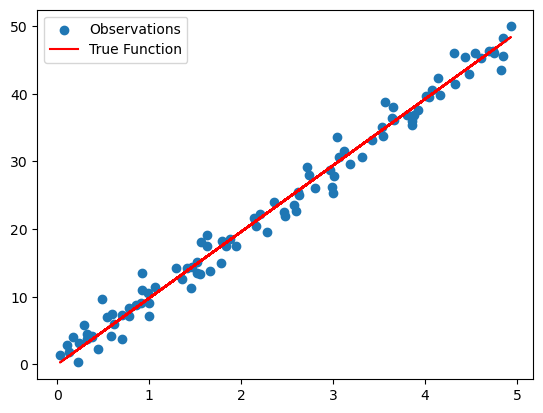

In [3]:
plt.scatter(x, y_obs, label = "Observations")
plt.plot(x, y, c = 'r', label = 'True Function')
plt.legend()
plt.show()

# Gradient Descent

In [5]:
#10.2, 20.2 -> 10, 20

In [6]:
#Helper Functions

def f(w):
    return w * x

def loss_function(e):
    L = np.sum(np.square(e)) / N
    return L

def dL_dw(e, w):
    return -2 * np.mean(e * x)

In [8]:
#The actual Gradient Descent

def gradient_descent(iter = 100, gamma = 0.1): #gamma is learning rate
    #get starting conditions
    w = 10 * np.random.randn()
    
    params = []
    loss = np.zeros((iter, 1))
    
    for i in range(iter):
        params.append(w)
        
        #calculate the error
        e = y_obs - f(w) #must use y_obs, not y (you do not have access to true y)
        #calculate the loss
        loss[i] = loss_function(e)
        
        #update parameters
        #current w, minus learning rate multiplied by the gradient
        w_new = w - gamma * dL_dw(e, w)
        w = w_new
        
    return params, loss

params, loss = gradient_descent()
    

### Gradient Descent outside of the function

In [9]:
iter = 100
gamma = 0.1
w = 10 * np.random.randn()

params = []
loss = np.zeros((iter, 1)) #initialize np array of zeros, iter = 100

for i in range(iter):
    params.append(w)
    
    #calculate the error
    e = y_obs - f(w) #must use y_obs, not y (you do not have access to true y)
    #calculate the loss
    loss[i] = loss_function(e)
    
    #update parameters
    #current w, minus learning rate multiplied by the gradient
    w_new = w - gamma * dL_dw(e, w)
    w = w_new

In [10]:
dL_dw(e, w)

1.63025148935958e-14

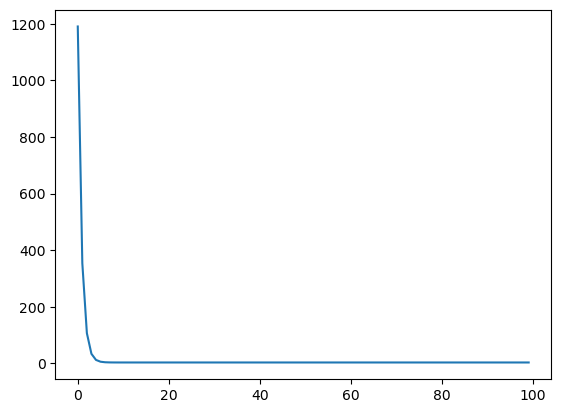

In [11]:
plt.plot(loss)
plt.show()

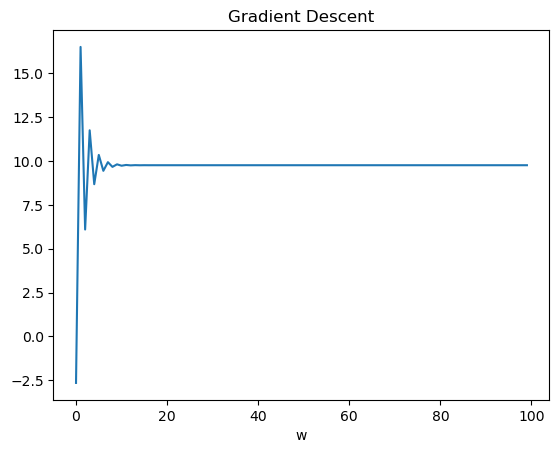

In [12]:
params = np.array(params)
plt.plot(params)
plt.title('Gradient Descent')
plt.xlabel('w')
plt.show()

In [13]:
params[-1]

9.757142247178274